# Assignment 1 - General

1) Write a function that list all the possible outcomes with five dice.

In [217]:
def listAll(numberofDices=5):
    results = [[]]
    for k in range(numberofDices):
        resultsCopy = results[:]
        results = []
        for i in resultsCopy:
            for j in [1,2,3,4,5,6]:
                results.append(i + [j])
    return results

2) Write a function that takes a number of dices and return all the possible outcomes for that amount of dices.

**The last function already does that**

3) Write functions that return, given five dice, True or False if we have Straight, Full, Poker or Generala.

In [218]:
def haveIStraight(dices, numberofDices = 5):
    if(len(dices) != numberofDices):
        print("Check the number of dices")
    else:
        dices.sort()
        for i in range(numberofDices-1):            
            if(dices[i] == dices[i+1]):
                return False
        return True

def haveIFull(dices, numberofDices = 5):
    
    if(len(dices) != numberofDices):
        print("Check the number of dices")
    else:
        dices.sort()
        element1 = dices[0]
        element2 = dices[numberofDices-1]
        if((dices.count(element1) == 2 and dices.count(element2) == 3) or (dices.count(element1) == 3 and dices.count(element2) == 2)):
            return True
        return False
    
def haveIPoker(dices, numberofDices = 5):
    if(len(dices) != numberofDices):
        print("Check the number of dices")
    else:
        dices.sort()
        element1 = dices[0]
        element2 = dices[numberofDices-1]
        if((dices.count(element1) == 4 or dices.count(element2) == 4) and element1 != element2):
            return True
        return False

def haveIGenerala(dices, numberofDices = 5):
    if(len(dices) != numberofDices):
        print("Check the number of dices")
    else:
        return dices.count(dices[0]) == numberofDices
    

4) Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands ​served​.

In [225]:
def probStraightFirstRound(outcomes, numberofDices = 5):
    i=0
    straight=0
    while i<len(outcomes):
        if(haveIStraight(outcomes[i], numberofDices)):
            straight += 1
        i+=1
    return straight/len(outcomes)
def probabilitiesServed(numberofDices = 5):
    dict = {}
    outcomes = listAll(numberofDices)
    full = 0
    straight = 0 
    generala = 0
    poker = 0
    i=0
    while i<len(outcomes):
        if(haveIFull(outcomes[i], numberofDices)):
            full += 1
        if(haveIGenerala(outcomes[i], numberofDices)):
            generala += 1
        if(haveIPoker(outcomes[i], numberofDices)):
            poker += 1
        i+=1
        
    dict = { "Poker" : 3*poker/len(outcomes),
             "Full" : 3*full/len(outcomes),
             "Straight" : 3*probStraightFirstRound(outcomes, numberofDices),
             "Generala" : 3*generala/len(outcomes)}
    
    #print("Probs: ")
    #print("Poker = %f " % (poker/len(outcomes)))
    #print("Full = %f " % (full/len(outcomes)))
    #print("Generala = %f " % (generala/len(outcomes)))
    #print("Straight = %f " % (probStraightFirstRound(outcomes)))
    return dict

probabilitiesServed()

{'Poker': 0.05787037037037037,
 'Full': 0.11574074074074074,
 'Straight': 0.2777777777777778,
 'Generala': 0.0023148148148148147}

5) Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands.

In [227]:
'''class Tree(object):
    def __init__(self):
        self.left = None
        self.child = []
        self.data = {}

def probSiguientesTiradas(root, numberofDices = 5):
    
    root.data = probabilitiesServed(numberofDices)
    
    for i in range (0,5):
        root.child = [Tree()]*5
        probSiguientesTiradas(root.child[i], numberofDices = numberofDices-i)
        #return probSiguientesTiradas(numberofDices = numberofDices-i, dict = dict)
       
    return root     
'''    


Probabilities:
Poker = 0.000000 
Full = 0.000000 
Generala = 0.013889 
Straight = 0.833333 
Probabilities:
Poker = 0.000000 
Full = 0.000000 
Generala = 0.013889 
Straight = 0.833333 
Probabilities:
Poker = 0.000000 
Full = 0.000000 
Generala = 0.013889 
Straight = 0.833333 
None


6) Write a function that simulate a roll with n fair dices.

In [81]:
import random as random
def randomRoll(numberofDices = 5):
    result = list()
    for i in range(numberofDices):
        result.append(random.randrange(1,7,1))
    return result

randomRoll(3)
        

[1, 2, 3]

7) Write a function that plays automatically, always looking for a Generala with a greedy strategy (always keeping the most dices of the same kind and rolling the others) that returns True if we get a Generala and a False otherwise.

In [221]:
def getDicesRepeated(dices):
    rep = dices[0]
    for i in dices:
        if(dices.count(rep) < dices.count(i)):
            rep = i
    return (rep, dices.count(rep))
        
def addToList(lista, number, reps):
    for i in range(reps):
        lista.append(number)
    return lista    
    
def lookingForGenerala(numberofDices = 5):
    result = randomRoll(numberofDices)
    
    if haveIGenerala(result,len(result)):
        return True
    else:
        number, repes = getDicesRepeated(result)
        result = randomRoll(numberofDices-repes)
        
        addToList(result, number, repes)
        
        if haveIGenerala(result,len(result)):
           return True
        else:
           repes = result.count(number)
           result = randomRoll(numberofDices-repes)
           addToList(result, number, repes)
           if haveIGenerala(result,len(result)):
              return True
           else: 
              return False

lookingForGenerala()
                        

False

In [222]:
def lookingForGeneralaResults(numberofDices = 5):
    result = randomRoll(numberofDices)
    
    if haveIGenerala(result,len(result)):
        return result
    else:
        number, repes = getDicesRepeated(result)
        result = randomRoll(numberofDices-repes)
        
        addToList(result, number, repes)
        
        if haveIGenerala(result,len(result)):
           return result
        else:
           repes = result.count(number)
           result = randomRoll(numberofDices-repes)
           addToList(result, number, repes)
           if haveIGenerala(result,len(result)):
              return result
           else: 
              return result



7b) Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

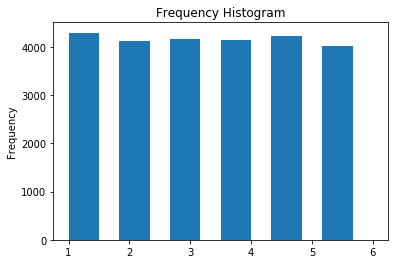

In [223]:
 %matplotlib inline
import matplotlib.pyplot as plt
x = list()
for i in range(5000):
    x.extend(lookingForGeneralaResults())

plt.hist(x, bins = 6, width = 0.5)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

The results follow an uniform discrete distribution, as every value (from 1 to 6) has the same probability of coming up in every dice, in every roll (Only if the dices are fair).

8) Write a function that plays until it gets a Generala, count how many times it had to play to get it and return this number.

In [198]:
def playUntilGenerala():
    result = lookingForGenerala()
    count = 1
    while result is False:
        result = lookingForGenerala()
        count +=1
        return count

playUntilGenerala()

3

8b) Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

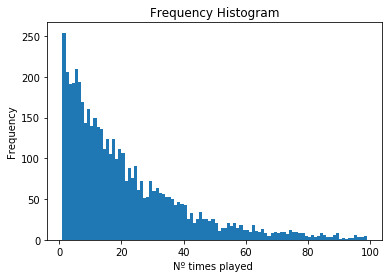

In [213]:

x = list()
for i in range(5000):
    x.append(playUntilGenerala())

plt.hist(x, bins = range(min(x), 100))
plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='Nº times played');

The data follows a logarithmic distribution, it can be seen that the necessary number of times descends logarithmically. This is logical, because we throw the dices a lot of times and eventually we will get to Generala after not a lot of times. This is because we are keepeng the most dices every roll, if we did it randomly (not keeping dices) we would obtain a much bigger logarithm (as seen below).  I'd say that the more times we throw the dices, we have more probability of getting Generala. 


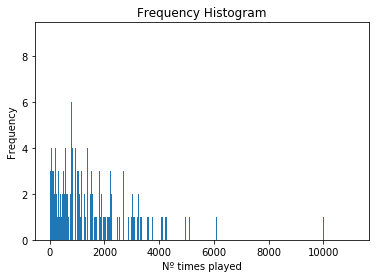

In [224]:
def lookingForGeneralaPrueba(numberofDices = 5):
    result = randomRoll(numberofDices)
    
    if haveIGenerala(result,len(result)):
        return True
    else:
        return False
    
def playUntilGeneralaPrueba():
    result = lookingForGeneralaPrueba()
    count = 1
    while result is False:
        result = lookingForGeneralaPrueba()
        count +=1
    return count

x = list()
for i in range(5000):
    x.append(playUntilGeneralaPrueba())

plt.hist(x, bins = range(min(x), max(x)))
plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='Nº times played');   